<h1> Remover Outliers </h1>

<h2> Anteriormente, lidamos com o problema de Dados Faltantes. Agora vamos olhar para os "outliers"</h2>
    
    Utilizarei aqui a análise de quartís que, resumidamente, pode ser entendido da seguinte maneira:
    Pensando em dados numéricos, podemos dividir o domínio dos valores em regiões que compreendem 0-25%, 25%-50%, 50%-75% e 75%-100% dos dados.
    
    Definimos Q1 como o valor que delimita os primeiros 25% dos dados. Analogamente, Q2 para 50%, Q3 para 75% e Q4 para 100%.
    Se tomarmos o intervalo Q1 até Q3, teremos o núcleo que compreende 50% dos dados. Essa região é denominada IQR (interquartile range).
    
    A idéia por trás da classificação de um dado como "Outlier" é a determinação de que este dado está demasiadamente distante do núcleo definido pelo IQR.
    
    É comum utilizarmos um valor de 1.5 vezes o IQR, partindo dos pontos Q1 (para menos) e Q3 (para mais), para definirmos uma distância apropriada. Ou seja:
    
    se X < Q1 - 1.5*IQR = Outlier
    e também
    se X > Q3 + 1.5*IQR = Outlier
    
    
    Usaremos essa abordagem para identificar e remover os valores considerados outliers.
    Optei aqui por remover os outliers. No entanto, eles podem muitas vezes representar a variabilidade real daquela variável. Remover ou não os outliers é uma decisão que depende de cada caso específico! No estudo do preço das casas, não estou interessado naqueles casos que são muito diferentes dos demais. Quero descobrir o preço do maior número de casas possíveis, me atendo assim ao núcleo próximo ao IQR. Logo, removerei os outliers.
    
<hr>

In [5]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns

<hr>

<h3>Abro os dados salvos em train_NoNAN.csv, sem números faltantes, que gerei anteriormente com o script Missing_Data.ipynb

In [6]:
df=pd.read_csv('data/train_NoNAN.csv')      # Dados sem missing data
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


<hr>
Vou separar as variáveis independentes em tipos numéricas e categóricas, armazenando seus nomes nas listas x_num e x_cat, respectivamente. Faço isso pois, no estudo subsequente, utilizarei apenas as variáveis numéricas.


    

In [7]:
x_cat = [cname for cname in df.columns if  df[cname].dtype == 'object']
x_real = [ cname for cname in df.columns if df[cname].dtype ==  'float64']
x_int = [ cname for cname in df.columns if df[cname].dtype == 'int64']

# Removo as duas primeiras colunas, pois não contém informações que preciso
x_cat=x_cat[2::]
x_num=x_real#[2::]
x_int=x_int[2::]#.remove('BsmtFinSF2')
#persona_non_grata=['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch']
#x_int=[essesim for essesim in x_int if essesim not in persona_non_grata]
#x_int

Defino duas funções para vizualizar os resultados

In [8]:
def Lumus(df,varb):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
    for col, ax in zip(varb, axs.ravel()):
        #sns.scatterplot(data=df,x=col,y="SalePrice",Alpha=0.3,ax=ax)     
        sns.regplot(data=df,x=col,y="SalePrice",ax=ax)
        plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                            wspace=0.3)
def Lumus_Maxima(tabela):
    fig = plt.figure(figsize =(5, 4))
    ax = fig.add_axes([0, 0, 0.4, 1])
    boxplot = tabela.boxplot(column=['LotArea','SalePrice'])  
    ax2 = fig.add_axes([0.5, 0, 0.6, 1])
    boxplot = tabela.boxplot(column=['GrLivArea','1stFlrSF'])  
    ax3 = fig.add_axes([1.2, 0, 1.1, 1])
    boxplot = tabela.boxplot(column=['OverallQual','GarageCars','FullBath'])  


<hr>
 Para facilitar o entendimento, vou olhar apenas para algumas variáveis, mas a remoção dos outliers dar-se-á em todas as variáveis numéricas.</h2>

  Vou salvar os nomes dessas variáveis numa lista (bad_list)
   
    


In [9]:
bad_list=['OverallQual','GrLivArea','1stFlrSF','GarageCars','FullBath','LotArea','SalePrice']



<h2> Vamos ver os dados em questão! </h2>

Façamos um Boxplot, que nos diz a distribuição dos quartis e os outliers, e também um scatterplot.

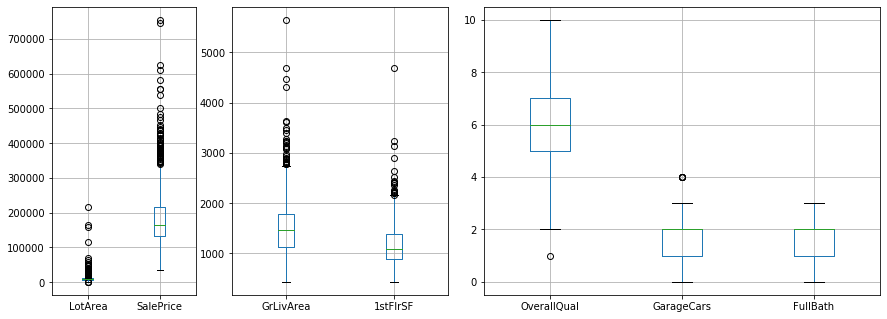

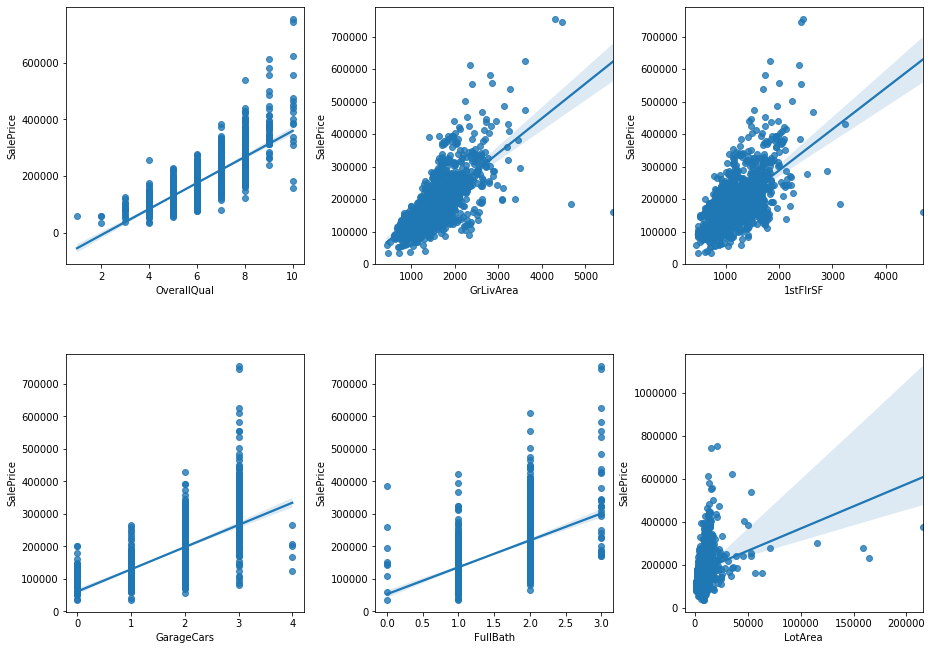

In [10]:
Lumus_Maxima(df)
Lumus(df,bad_list)

<hr>
Os outliers podem ser vistos no gráfico boxplot pelos círculos que estão além das barbelas.

Confrontado os resultados do BoxPlot e Scatterplot, notemos:

 - Há variáveis com outliers bastante evidentes (GrLivArea, 1stFlrSF, LotArea);
 - Há variáveis com poucos ou nenhum outlier (FullBath, GarageCars, OverallQual).

<h2> Para eliminar definitivamente os outliers, façamos .... </h2>



In [11]:
def Expelliarmus(df1):
    # IQR = Q3 - Q1
    df2=df1#.copy()
    Q3=df2.quantile(0.75)
    Q1=df2.quantile(0.25)
    IQR=Q3-Q1
    #print(IQR)
    df2=df2[~((df2 < (Q1-1.5*IQR)) | (df2 > (Q3 + 1.5*IQR))).any(axis=1)]
    df2.shape
    return df2
df2=Expelliarmus(df)

/home/wlademir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


<hr>
<h1> Vamos ver como ficou!</h1>

(552, 78)

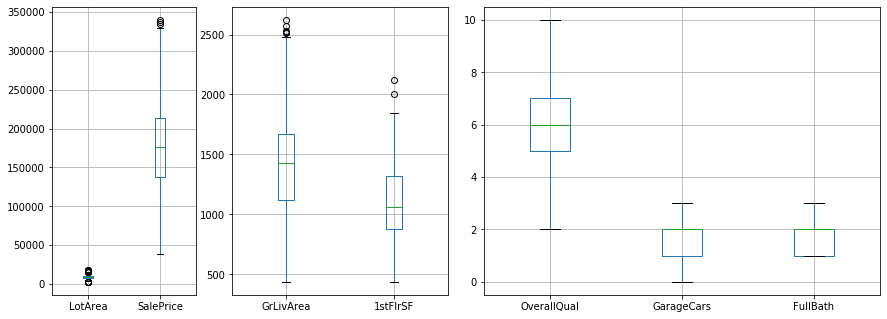

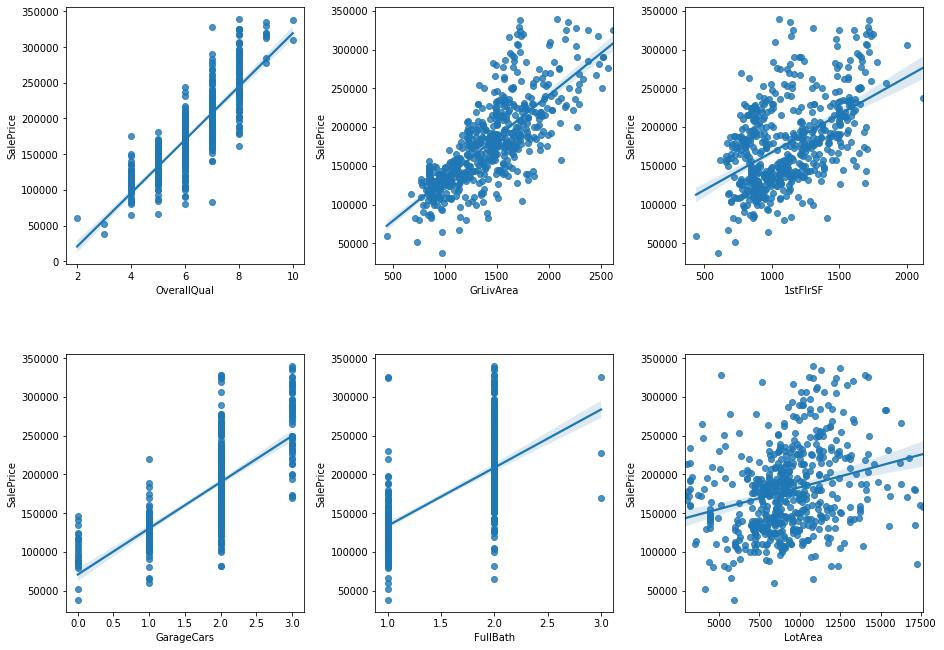

In [12]:
Lumus_Maxima(df2)
Lumus(df2,bad_list)
df2.shape

<hr>
<h3> Após removermos os pontos considerados outliers, notamos que: </h3>
    
    - Há ainda outliers presentes em LotArea, SalePrice, GrLivArea e 1stFlrSF.
      Isso ocorre pois, após removermos os outliers uma vez, a amostra sofre alterações (em sua mediana, por exemplo)
      A formação de um novo boxplot pode, assim, apontar novos outliers;
    - Houve redução no RMS do ajuste linear, que está visualmente mais consistente;
    - A relação linear com  LotArea não é mais tão promissora quanto parecia antes;
    
<hr>
<h3> Pois bem, é isso! Vamos salvar e continuar os estudos em MLR_v0 </h3>

    

In [13]:
df2.isnull().sum().sort_values(ascending=False)[0:20]*100/len(df2)
df2.to_csv('data/train_NoNAN_NoOutlier.csv')